In [49]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
bank_data = pd.read_csv('../Datasets/bank_subscription.csv', sep=';')

In [51]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
bank_data.shape

(45211, 17)

In [53]:
#Converting 'y' to 'subscribed' for easy understability
bank_data = bank_data.rename({'y':'subscribed'},axis=1)


#Converting target feature into numerical values. Yes = 1 and No = 0.
bank_data['subscribed'] = bank_data.subscribed.replace(['no','yes'],[0,1])
print(bank_data.subscribed.value_counts())

0    39922
1     5289
Name: subscribed, dtype: int64


In [54]:
bank_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


<AxesSubplot:>

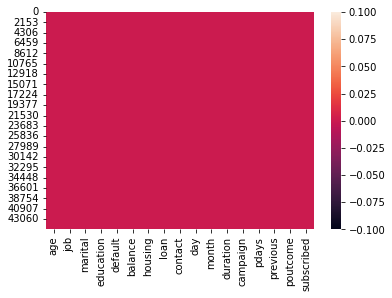

In [55]:
sns.heatmap(data = bank_data.isnull())

In [56]:
categorical_features = [feature for feature in bank_data.columns if bank_data[feature].dtype == 'O']
print(categorical_features)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [57]:
for feature in categorical_features:
        print('{} = {}'.format(feature,bank_data[feature].unique()))

job = ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital = ['married' 'single' 'divorced']
education = ['tertiary' 'secondary' 'unknown' 'primary']
default = ['no' 'yes']
housing = ['yes' 'no']
loan = ['no' 'yes']
contact = ['unknown' 'cellular' 'telephone']
month = ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome = ['unknown' 'failure' 'other' 'success']


In [58]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(bank_data[bank_data.columns[:-1]], bank_data['subscribed'], test_size=0.20)

In [59]:
#Combining train_X, train_y for EDA.

train = pd.concat([train_X,train_y], axis = 1)

In [60]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
7278,31,blue-collar,married,primary,no,490,yes,no,unknown,29,may,180,2,-1,0,unknown,0
26886,40,unemployed,married,secondary,no,3430,yes,no,cellular,20,nov,1855,3,-1,0,unknown,0
4644,33,services,single,secondary,no,0,yes,no,unknown,20,may,134,3,-1,0,unknown,0
3266,46,blue-collar,married,secondary,no,1004,yes,no,unknown,15,may,34,1,-1,0,unknown,0
9945,48,technician,married,secondary,no,5,no,no,unknown,9,jun,65,6,-1,0,unknown,0


<AxesSubplot:xlabel='poutcome', ylabel='Count'>

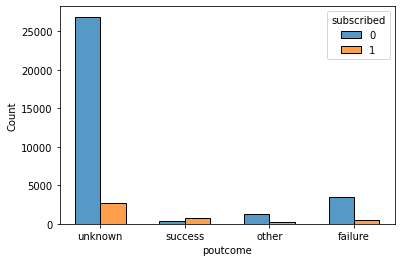

In [61]:
sns.histplot(data = train, x='poutcome', hue='subscribed', multiple='dodge', shrink=.6)

<AxesSubplot:xlabel='poutcome', ylabel='Count'>

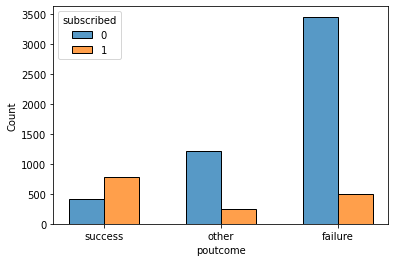

In [62]:
#Checking after removing unknown to get better relation between other options.
sns.histplot(data = train.drop(train[train.poutcome == 'unknown'].index), x='poutcome', hue='subscribed', multiple='dodge', shrink=.6)

<AxesSubplot:xlabel='day', ylabel='Count'>

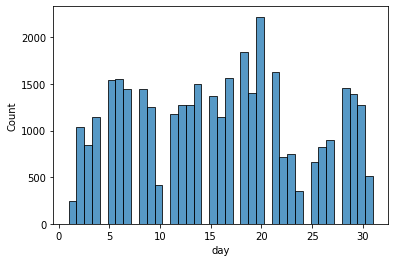

In [63]:
sns.histplot(data = train, x='day')

<AxesSubplot:xlabel='month', ylabel='Count'>

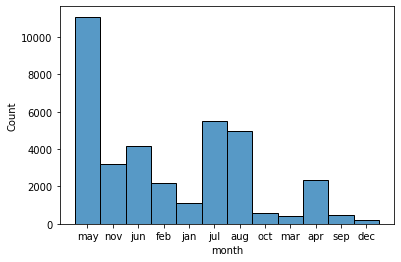

In [64]:
sns.histplot(data = train, x = 'month')

In [65]:
train['month'] = train.month.replace(['jan','feb','mar'], 1)
train['month'] = train.month.replace(['apr','may','jun'], 2)
train['month'] = train.month.replace(['jul','aug','sep'], 3)
train['month'] = train.month.replace(['oct','nov','dec'], 4)

train = train.rename({'month':'quarter'},axis = 1)

<AxesSubplot:xlabel='quarter', ylabel='Count'>

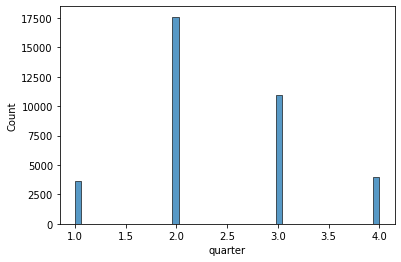

In [67]:
sns.histplot(data = train, x='quarter')

In [68]:
train = train.drop(['day'], axis = 1)
print(train.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'quarter', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')


<AxesSubplot:xlabel='job', ylabel='Count'>

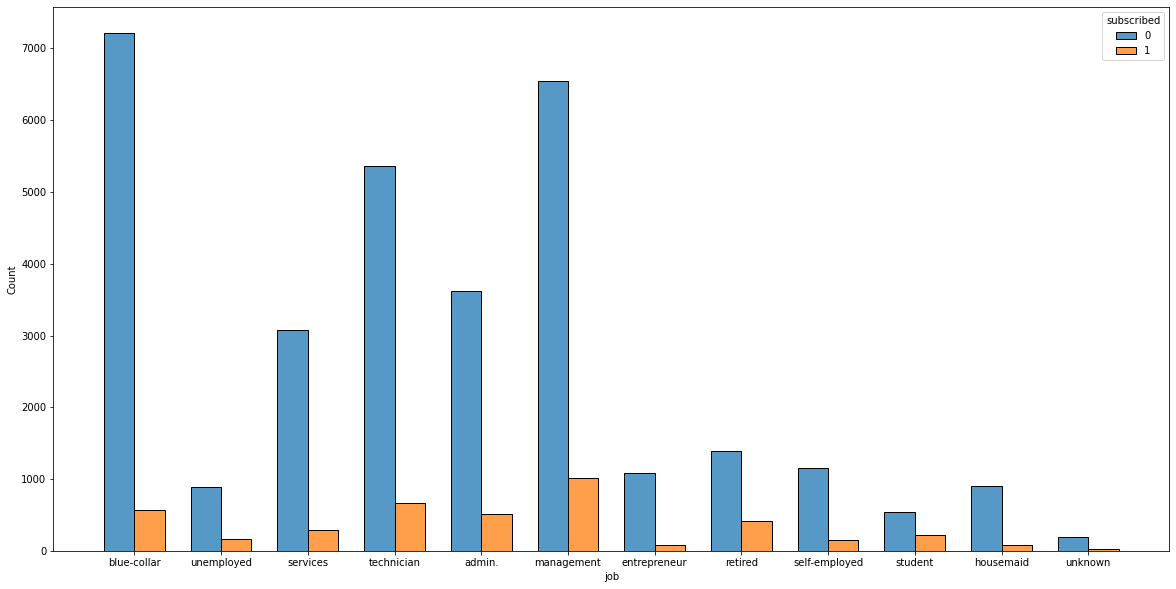

In [73]:
plt.figure(figsize=(20,10))
sns.histplot(data = train, x='job', hue='subscribed', multiple='dodge', shrink=0.7)

Merging possibilities:

blue-collar, admin, management <br>
entrepreneur, self-employed <br>
unemployed, retired, student <br>
technician, services, housemaid <br>
unknown

<AxesSubplot:xlabel='job', ylabel='balance'>

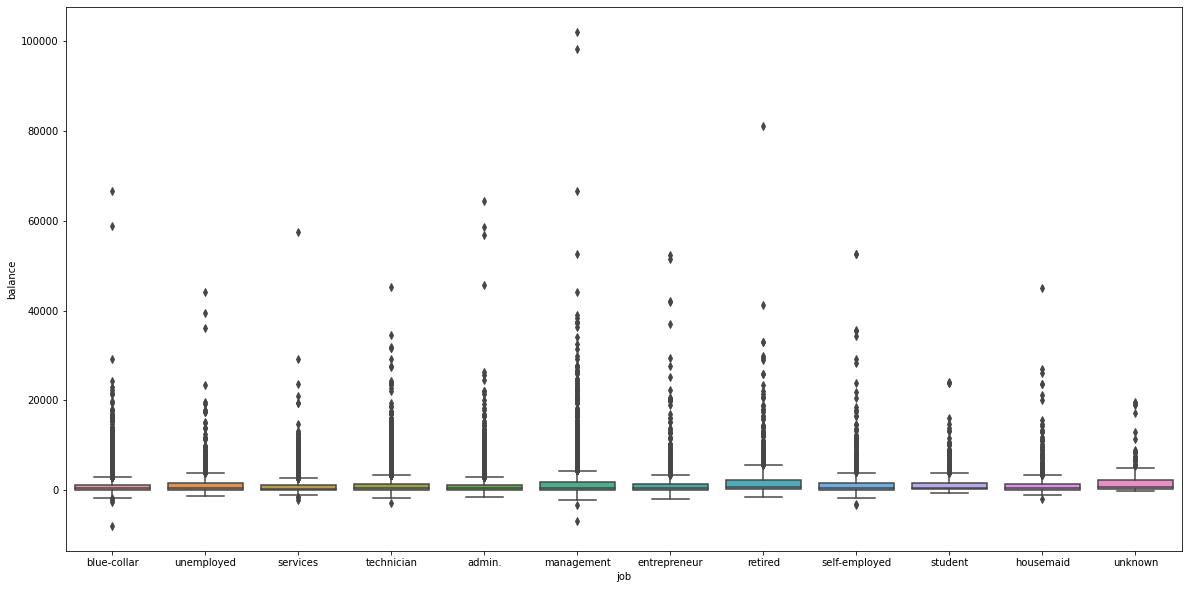

In [79]:
plt.figure(figsize=(20,10))
sns.boxplot(data = train, x= 'job', y=  'balance')

In [81]:
temp =  train.drop(train[train['balance']>50000].index)

<AxesSubplot:xlabel='job', ylabel='balance'>

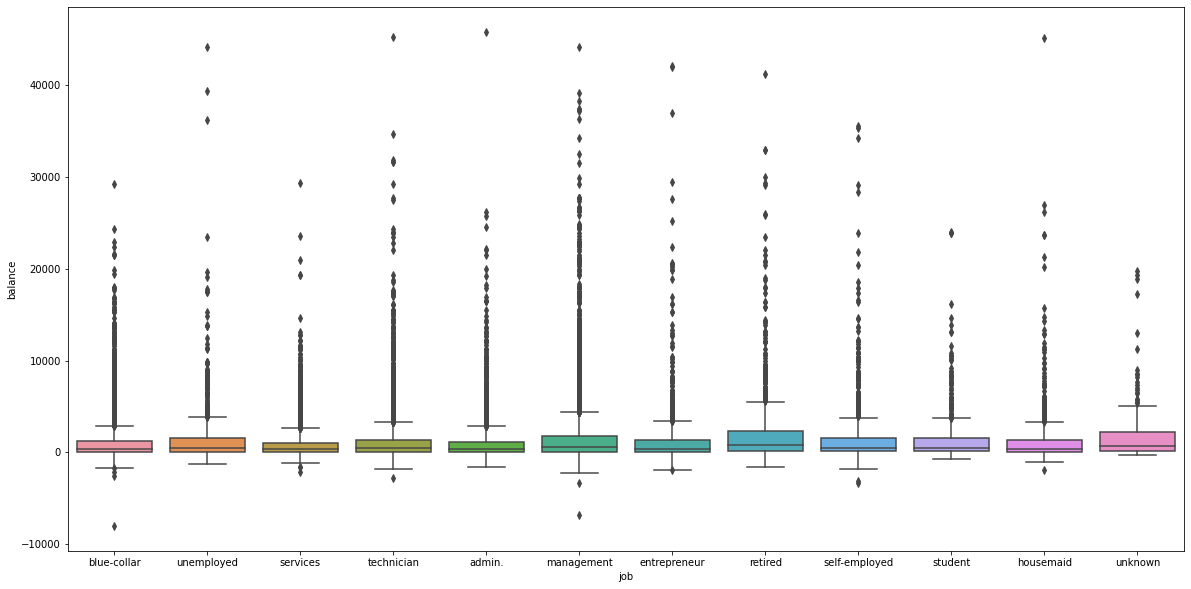

In [82]:
plt.figure(figsize=(20,10))
sns.boxplot(data = temp, x= 'job', y=  'balance')